In [2]:
# set the current working directory
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('/Users/cgu3/Documents/Grape-Pi')

# directly apply a pre-trained model in bruker data

In [28]:
# label_col is set to any arbitrary column since we are not retrain this model
!python grape_pi.py --cfg results/grapepi_sageconv_thresh_400.0/config.yaml --checkpoint results/grapepi_sageconv_thresh_400.0/1234/ckpt/epoch=145-step=14016.ckpt --output results/grapepi_sageconv_bruker/evaluation --override 'dataset.dir=data/bruker dataset.label_col=protein_probability'

GraphsageGraphGymModule(
  (model): GNN(
    (encoder): FeatureEncoder()
    (pre_mp): GeneralMultiLayer(
      (Layer_0): GeneralLayer(
        (layer): Linear(
          (model): Linear(-1, 10, bias=True)
        )
        (post_layer): Sequential(
          (0): ReLU()
        )
      )
    )
    (mp): GNNStackStage(
      (layer0): GeneralLayer(
        (layer): SAGEConv(
          (model): SAGEConv(10, 10, aggr=mean)
        )
        (post_layer): Sequential(
          (0): ReLU()
        )
      )
    )
    (post_mp): ExampleNodeHead(
      (layer_post_mp): MLP(
        (model): Sequential(
          (0): Linear(
            (model): Linear(10, 1, bias=True)
          )
        )
      )
    )
  )
)
accelerator: cpu
benchmark: False
bn:
  eps: 1e-05
  mom: 0.1
cfg_dest: config.yaml
custom_metrics: []
dataset:
  cache_load: False
  cache_save: False
  dir: data/bruker
  edge_dim: 128
  edge_encoder: False
  edge_encoder_bn: True
  edge_encoder_name: Bond
  edge_message_ratio: 0.8

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_protein_data(result, unconfident_threshold_lower, unconfident_threshold_upper, title):
    dat = pd.read_csv(result)
    dat = dat.loc[:, ['accession', 'gene_symbol', 'pred_prob', 'protein_probability', 'mRNA']]
    dat.rename(columns={'protein_probability': 'raw_prob', 'mRNA_TPM': 'mRNA'}, inplace=True)
    output_dir = os.path.dirname(result)
    output = os.path.join(output_dir, 'mRNA_coverage.tiff')

    # dat = dat[dat[label_col].isnull()]
    dat = dat[(dat['raw_prob'] >= unconfident_threshold_lower)]
    dat = dat[(dat['raw_prob'] <= unconfident_threshold_upper)]
    dat['mRNA'] = dat['mRNA'].apply(lambda x: 1 if x > 0 else 0)

    pred_prob_preded_mRNA_coverage = []
    raw_prob_preded_mRNA_coverage = []
    for N in range(100, dat.shape[0], 1):
        positive_by_pred = dat.sort_values(by='pred_prob', ascending=False).reset_index(drop=True).iloc[:N, dat.columns.get_loc('mRNA')]
        positive_by_raw = dat.sort_values(by='raw_prob', ascending=False).reset_index(drop=True).iloc[:N, dat.columns.get_loc('mRNA')]

        pred_prob_preded_mRNA_coverage.append(np.sum(positive_by_pred) / len(positive_by_pred))
        raw_prob_preded_mRNA_coverage.append(np.sum(positive_by_raw) / len(positive_by_raw))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(pred_prob_preded_mRNA_coverage)
    ax.plot(raw_prob_preded_mRNA_coverage)
    ax.set_xlabel('Number of proteins predicted to be positive')
    ax.set_xlim(0, dat.shape[0])
    ax.set_xticks(range(0, dat.shape[0], 100))
    ax.set_ylabel('Proportion of proteins with detected corresponding mRNA')
    plt.legend(['Predicted protein probability', 'Raw protein probability'])
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()
    fig.savefig(output, format='tiff', dpi=350, bbox_inches='tight')

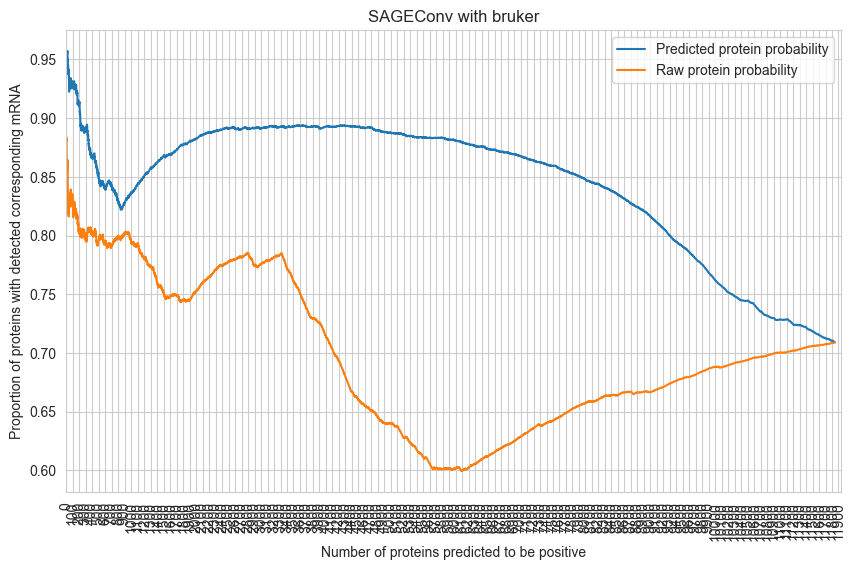

In [15]:
analyze_protein_data('results/grapepi_sageconv_bruker/evaluation/all_proteins.csv',unconfident_threshold_lower=0, unconfident_threshold_upper=0.95, title='SAGEConv with bruker')

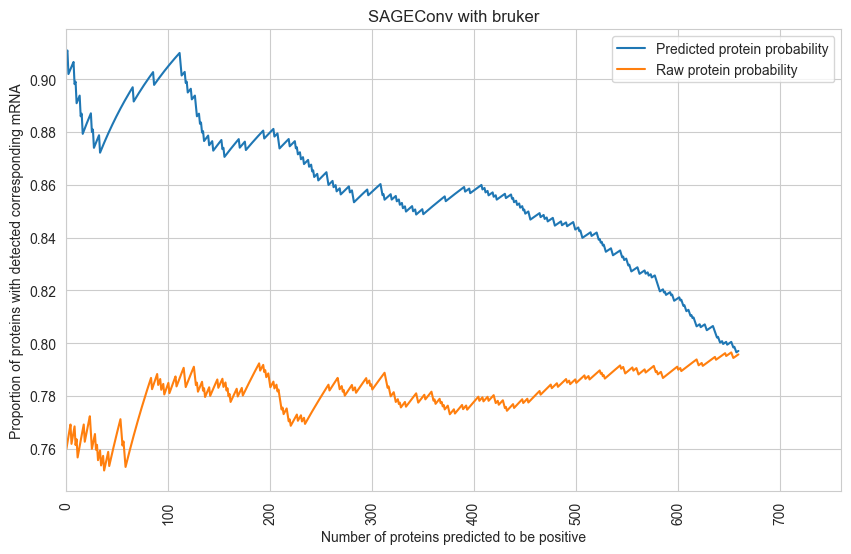

In [14]:
analyze_protein_data('results/grapepi_sageconv_bruker/evaluation/all_proteins.csv',unconfident_threshold_lower=0.1, unconfident_threshold_upper=0.9, title='SAGEConv with bruker')

In [42]:
!python grape_pi.py --cfg results/grapepi_sageconv_with_embedding/config.yaml --checkpoint results/grapepi_sageconv_with_embedding/1234/ckpt/epoch=69-step=6720.ckpt --output results/grapepi_sageconv_with_embedding_bruker/evaluation --override 'dataset.dir=data/bruker dataset.label_col=protein_probability'

GraphsageGraphGymModule(
  (model): GNN(
    (encoder): FeatureEncoder()
    (pre_mp): GeneralMultiLayer(
      (Layer_0): GeneralLayer(
        (layer): Linear(
          (model): Linear(-1, 10, bias=True)
        )
        (post_layer): Sequential(
          (0): ReLU()
        )
      )
    )
    (post_mp): ExampleNodeHead(
      (layer_post_mp): MLP(
        (model): Sequential(
          (0): Linear(
            (model): Linear(10, 1, bias=True)
          )
        )
      )
    )
  )
)
accelerator: cpu
benchmark: False
bn:
  eps: 1e-05
  mom: 0.1
cfg_dest: config.yaml
custom_metrics: []
dataset:
  cache_load: False
  cache_save: False
  dir: data/bruker
  edge_dim: 128
  edge_encoder: False
  edge_encoder_bn: True
  edge_encoder_name: Bond
  edge_message_ratio: 0.8
  edge_negative_sampling_ratio: 1.0
  edge_numeric_cols: None
  edge_train_mode: all
  encoder: True
  encoder_bn: True
  encoder_dim: 128
  encoder_name: db
  format: PyG
  include_seq_embedding: True
  interaction_co

In [54]:
analyze_protein_data('results/grapepi_sageconv_with_embedding_bruker/evaluation/all_proteins.csv',unconfident_threshold=1, title='SAGEConv with embedding in bruker')

TypeError: analyze_protein_data() got an unexpected keyword argument 'unconfident_threshold'

GraphsageGraphGymModule(
  (model): GNN(
    (encoder): FeatureEncoder()
    (pre_mp): GeneralMultiLayer(
      (Layer_0): GeneralLayer(
        (layer): Linear(
          (model): Linear(-1, 10, bias=True)
        )
        (post_layer): Sequential(
          (0): ReLU()
        )
      )
    )
    (post_mp): ExampleNodeHead(
      (layer_post_mp): MLP(
        (model): Sequential(
          (0): Linear(
            (model): Linear(10, 1, bias=True)
          )
        )
      )
    )
  )
)
accelerator: cpu
benchmark: False
bn:
  eps: 1e-05
  mom: 0.1
cfg_dest: config.yaml
custom_metrics: []
dataset:
  cache_load: False
  cache_save: False
  dir: data/bruker
  edge_dim: 128
  edge_encoder: False
  edge_encoder_bn: True
  edge_encoder_name: Bond
  edge_message_ratio: 0.8
  edge_negative_sampling_ratio: 1.0
  edge_numeric_cols: None
  edge_train_mode: all
  encoder: True
  encoder_bn: True
  encoder_dim: 128
  encoder_name: db
  format: PyG
  include_seq_embedding: True
  interaction_co

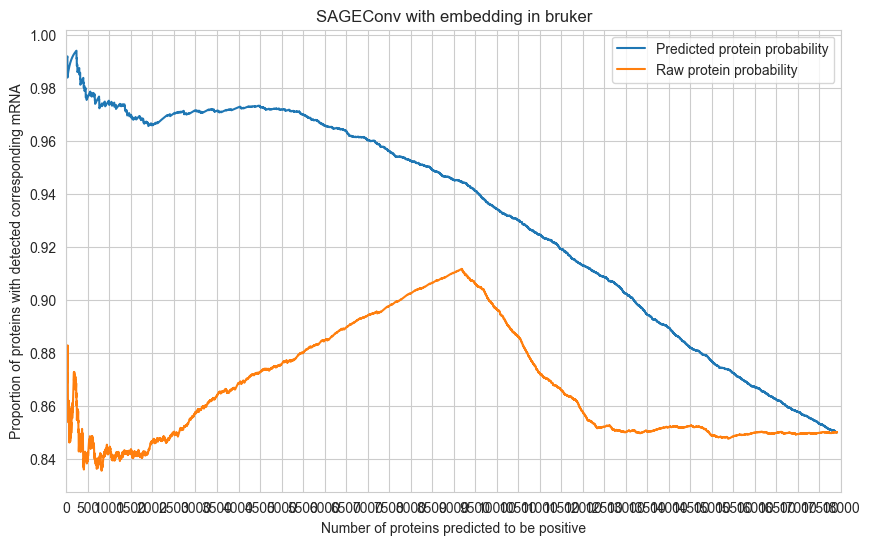

In [25]:
analyze_protein_data('results/grapepi_sageconv_with_embedding_bruker/evaluation/all_proteins.csv',unconfident_threshold=1, title='SAGEConv with embedding in bruker')